### Q3 lab03 max Fine

In [350]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.integrate import quad

a) Write a user-defined function H(n,x) that calculates Hn(x) for given x and any integer n ≥ 0.
Use your function to make a plot that shows the harmonic oscillator wavefunctions for n = 0, 1,
2, and 3, all on the same graph, in the range −4 ≤ x ≤ 4.

In [360]:
def hermite(n,x):
    '''calculates hermite polynomials'''
    
    '''2xhn = '''
    #n += 1 
   # print(n)
   # print('n input is ',n)
    
    # check if x is a single or a array
    
  
    try:
        h0 = np.ones(len(x))
    except:
        h0 = x
        
    
    h1 = 2*x
    
    if n == 0:
        return h0
    
    if n == 1:
        return h1
    
    #n += 1
    for i in range(1,n+1):
        # i should start at 2 and go until n
        #nth-1 = ni + ni-1
        #print('n is ',i)
        hn = 2*x*h1 - 2*i*h0
        
        #print(i==n-1)
        if i == n-1:
            #print(i-1)
            return hn
        
        # update values
        h0 = h1
        h1 = hn
        
        ##print(i==n-1)
        #if i == n-1:
         #   return hn
        

def H(n,x):
    '''calculates Hn(x) for given x and any integer n ≥ 0
    for Quantum haromic oscilator'''
    
    psi = (1/ np.sqrt(2**n *factorial(n) * \
                      np.sqrt(np.pi)))*np.exp(-0.5*x**2)
    
    h_nx = hermite(n,x)
    
    return h_nx * psi

def x2_integrand(x,n):
    return x**2 * np.abs(H(n,x)**2)

def expect_x2(n,x):
    
    # <x^2> = int -inf to inf x**2 |psi|**2
    
    x_2 = quad(x2_integrand, -np.inf,np.inf, (n))
    return x_2

def p2_integrand(x,n):
    
    return np.abs(H(n,x)**2)

def expect_p2():
    return

In [381]:
x = np.linspace(-4,4,50)

expect_x2(0,x)


(0.7499999999999999, 8.947584431776588e-09)

(-30.0, 30.0)

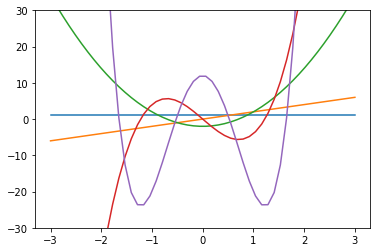

In [278]:
x = np.linspace(-3,3)
h0 = np.ones(len(x))
h1 = 2*x
h2 = 4*x**2 -2
h3 = 8*x**3 - 12*x
h4 = 16*x**4 -48*x**2 + 12

plt.plot(x,h0)
plt.plot(x,h1)
plt.plot(x,h2)
plt.plot(x,h3)
plt.plot(x,h4)
plt.ylim(-30,30)

Text(0.5, 1.0, 'First four hermite polynomials')

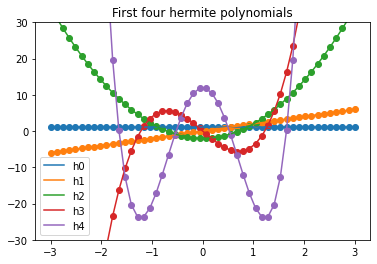

In [286]:
x = np.linspace(-3,3)

x = np.linspace(-3,3)
h0 = np.ones(len(x))
h1 = 2*x
h2 = 4*x**2 -2
h3 = 8*x**3 - 12*x
h4 = 16*x**4 -48*x**2 + 12

plt.scatter(x,h0)
plt.scatter(x,h1)
plt.scatter(x,h2)
plt.scatter(x,h3)
plt.scatter(x,h4)
plt.ylim(-30,30)
#plt.ylim
#plt.show()

n = 4
#y = hermite(n,x)

for i in range(n+1):
    #print(i)
    x = np.linspace(-3,3)
    yi  = hermite(i,x)
    #print('x, y', len(x), len(yi))

    plt.plot(x,yi, label= 'h'+ str(i))
    #if (yi == h4).all():
        #print(i, ' is the h3 poly')
plt.legend()
plt.ylim(-30,30) # looks too tall?
plt.title('First four hermite polynomials')

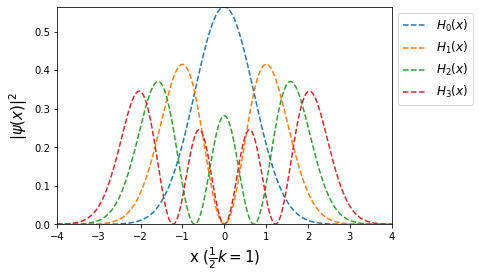

In [380]:
n = 3
fs = 15
x = np.linspace(-4,4,200)
max_yi = 0
#plt.plot(x,x**2, color = 'k', label = "Potential Well")
for i in range(n+1):
    yi = H(i,x)
    
    if max_yi < np.max(np.abs(yi**2)):
        max_yi = np.max(np.abs(yi**2))

    plt.plot(x, np.abs(yi**2), linestyle='--', 
             label ='$H_'+str(i)+'(x)$' , )
    

plt.xlim(-4,4)
plt.ylim(0, max_yi)
plt.ylabel('$|\psi(x)|^2$', fontsize=fs)
plt.xlabel(r'x ($\frac{1}{2}k = 1$)',fontsize=fs)
plt.legend(fontsize=12, bbox_to_anchor=(1,1))

In [315]:
dx = x[1] = x[0]
yi = H(5,x)
np.sum(yi) * dx

-0.18173819934167829

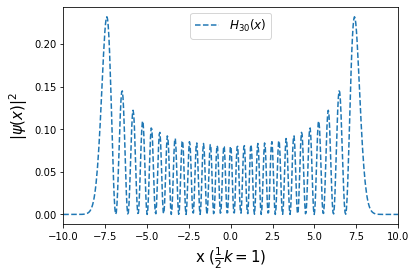

In [383]:
n = 30
x = np.linspace(-10,10, 500)
max_yi = 0
#plt.plot(x,x**2, color = 'k', label = "Potential Well")

yi = H(n,x)
    
if max_yi < np.max(yi):
    max_yi = np.max(yi)

plt.plot(x, np.abs(yi**2), linestyle='--', label ='$H_{'+str(n)+'}(x)$')
    

plt.xlim(-10,10)
#plt.ylim(0, max_yi)
#plt.ylim(0, max_yi)
plt.ylabel('$|\psi(x)|^2$', fontsize=fs)
plt.xlabel(r'x ($\frac{1}{2}k = 1$)',fontsize=fs)
plt.legend(fontsize=12)